In [41]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2
%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Clustering with top $p_T$ tracks

Lets try to understand how only keeping the top $p_T$ tracks helps us in our quest for the primary vertex clustering.
For this, we would like to understand how keeping only the top N tracks in $p_T$ affects the performance of both DBSCAN and FastHisto.
There will be no batching in this case, so this will be a first order effect only.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import mplhep as hep

In [44]:
hep.style.use("CMS")

In [45]:
mc = pd.read_pickle("/home/raichu/data/mc_25k.pkl")
trk = pd.read_pickle("/home/raichu/data/trk_processed_25k.pkl")

## Running Baseline

In [46]:
import sys

sys.path.append("..")

In [47]:
from notebooks.primaryvertexingtools import PrimaryVertexing, PerformanceMetrics

In [144]:
fh_bins = np.linspace(-15, 15, 256)

In [182]:
setup = {
    "track_data": trk,
    "truth_data": mc,
    "fh_bins": fh_bins,
    "test_run": False,
    "rank_by_pt": False,
}

In [183]:
pv = PrimaryVertexing(setup)

Initialized Primary Vertexing setup


In [184]:
pv.run_fh()
# pv.run_dbscan(stat="median")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:26<00:00, 942.05it/s]


Ran Fast Histo


In [149]:
pm = PerformanceMetrics(pv)

0.11908531
positive bias 0.03469515
negative bias -0.035159588


In [150]:
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_fh_cor), display=True)

74.29 %


In [151]:
fh_base_eff = pm.pv_eff

In [152]:
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_db_cor), display=True)
db_base_eff = pm.pv_eff

78.03 %


In [187]:
pv.run_dbscan(stat="fast_histo", nbins=30, weighted_mean=True, convolve=False)
pm = PerformanceMetrics(pv)
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_db_cor), display=True)
db_base_wm_eff = pm.pv_eff

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24997/25000 [07:37<00:00, 58.98it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11908531
positive bias 0.03286428188292323
negative bias -0.03427772253729122
77.88 %


In [186]:
pm.pv_eff

77.692

In [135]:
setup = {
    "track_data": trk,
    "truth_data": mc,
    "fh_bins": fh_bins,
    "test_run": True,
    "nevents_test": 1000,
    "rank_by_pt": True,
    "rank_limit_n": 150,
}

In [136]:
pv = PrimaryVertexing(setup)

Initialized Primary Vertexing setup


In [137]:
pv.run_fh()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1312.21it/s]


Ran Fast Histo


In [138]:
pv.run_dbscan(stat="median")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:15<00:00, 68.76it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [139]:
pm = PerformanceMetrics(pv)

0.11495209
positive bias 0.033415973
negative bias -0.037166834


In [140]:
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_fh_cor), display=True)

75.02 %


In [141]:
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_db_cor), display=True)

79.22 %


# Testing different cuts Limits

In [ ]:
fh_eff = []
db_eff = []
db_eff_wm = []
limits = [10, 20, 40, 70, 100, 150]
base_config = {
    "track_data": trk,
    "truth_data": mc,
    "fh_bins": fh_bins,
    "test_run": False,
    "rank_by_pt": True,
}
for lim in limits:

    config = {"rank_limit_n": lim}
    config.update(base_config)
    _pv = PrimaryVertexing(config)
    _pv.run_fh()
    _pv.run_dbscan(stat="median")

    _pm = PerformanceMetrics(_pv)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_fh_cor), display=False)
    fh_eff.append(_pm.pv_eff)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=False)
    db_eff.append(_pm.pv_eff)

    _pv.run_dbscan(stat="fast_histo", nbins=25, weighted_mean=True)
    _pm = PerformanceMetrics(_pv)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=False)
    db_eff_wm.append(_pm.pv_eff)



Initialized Primary Vertexing setup


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:24<00:00, 1011.55it/s]


Ran Fast Histo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24995/25000 [06:26<00:00, 78.58it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.12883472
positive bias 0.032715797
negative bias -0.032942504


  1%|██                                                                                                                                                                                                                                                                                                                                 | 157/25000 [00:03<06:06, 67.73it/s]/home/raichu/Documents/db-clustering/batched_dbscan/../notebooks/primaryvertexingtools.py:171: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(h * x_i) / N
  1%|███▏                                                                                                                                                                                                                                                                                                                               | 249/25000 [00:05<07:10, 57.47it/s]/home/raichu/Documents/db-clustering/batched_dbscan/../notebooks/primaryvertexingtools.p

Ran DBSCAN with eps: 0.08, minPts: 2
0.12883472
positive bias nan
negative bias nan
Initialized Primary Vertexing setup


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:27<00:00, 902.07it/s]


Ran Fast Histo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24994/25000 [07:34<00:00, 64.71it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.12187719
positive bias 0.030984163
negative bias -0.030871868


  2%|██████▎                                                                                                                                                                                                                                                                                                                            | 490/25000 [00:11<09:12, 44.33it/s]/home/raichu/Documents/db-clustering/batched_dbscan/../notebooks/primaryvertexingtools.py:171: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(h * x_i) / N
 11%|████████████████████████████████████▎                                                                                                                                                                                                                                                                                             | 2817/25000 [00:54<07:03, 52.38it/s]/home/raichu/Documents/db-clustering/batched_dbscan/../notebooks/primaryvertexingtools.p

Ran DBSCAN with eps: 0.08, minPts: 2
0.12187719
positive bias nan
negative bias nan
Initialized Primary Vertexing setup


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:29<00:00, 845.93it/s]


Ran Fast Histo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24999/25000 [07:10<00:00, 58.76it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11961728
positive bias 0.031048775
negative bias -0.031796455


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [07:53<00:00, 55.70it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11961728
positive bias 0.027507915830309315
negative bias -0.03352040045982596
Initialized Primary Vertexing setup


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:26<00:00, 958.30it/s]


Ran Fast Histo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24996/25000 [07:25<00:00, 62.14it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.1186409
positive bias 0.030976027
negative bias -0.031650215


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24998/25000 [08:05<00:00, 53.01it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.1186409
positive bias 0.026704348005644987
negative bias -0.034258333483699444
Initialized Primary Vertexing setup


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:27<00:00, 901.24it/s]


Ran Fast Histo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24995/25000 [07:29<00:00, 49.65it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11890566
positive bias 0.03186989
negative bias -0.032458305


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24998/25000 [07:51<00:00, 52.12it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11890566
positive bias 0.02689932237110426
negative bias -0.035157518049916625
Initialized Primary Vertexing setup


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:26<00:00, 928.57it/s]


Ran Fast Histo


 43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                      | 10782/25000 [03:00<03:52, 61.28it/s]

In [159]:
print("hi")

hi


(60.0, 85.0)

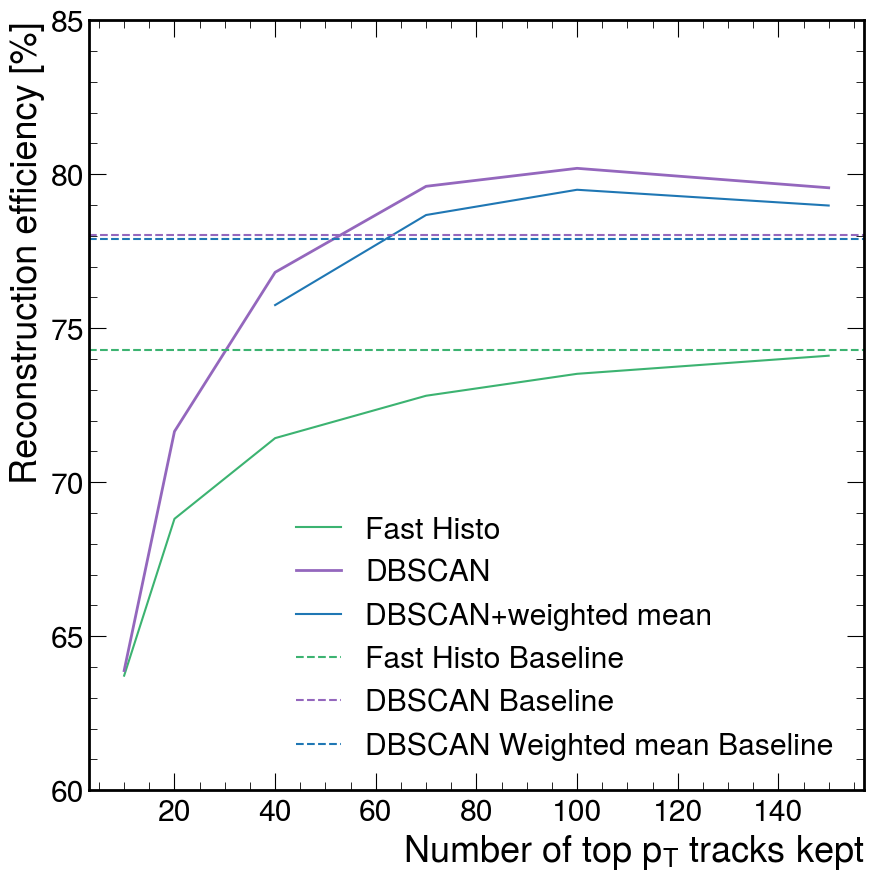

In [191]:
plt.plot(limits, fh_eff, label="Fast Histo", color="mediumseagreen")
plt.plot(limits, db_eff, label="DBSCAN", lw=2, color="tab:purple")
plt.plot(limits[2:], db_eff_wm[2:], label="DBSCAN+weighted mean", color="tab:blue")
plt.axhline(fh_base_eff, label="Fast Histo Baseline", ls="--", color="mediumseagreen")
plt.axhline(db_base_eff, label="DBSCAN Baseline", ls="--", color="tab:purple")
plt.axhline(
    db_base_wm_eff, label="DBSCAN Weighted mean Baseline", ls="--", color="tab:blue"
)
plt.legend()
_ = plt.xlabel("Number of top $p_T$ tracks kept")
_ = plt.ylabel("Reconstruction efficiency [%]")
plt.ylim([60, 85])

## Testing a classifier based cut

In [193]:
!ls -lhtr

total 2.2M
-rw-rw-r-- 1 raichu raichu 2.8K Nov  7 15:33  run_dbscan_file.py
-rw-rw-r-- 1 raichu raichu 5.3K Nov  7 15:33  clusters-4.txt
-rw-rw-r-- 1 raichu raichu  94K Nov  7 15:33  analyze_file_cpp_comp.ipynb
-rw-rw-r-- 1 raichu raichu 1.7K Nov  7 15:33  run_dbscan_multiple.py
-rw-rw-r-- 1 raichu raichu  778 Nov  7 15:33  clusters_cpp.txt
-rw-rw-r-- 1 raichu raichu 3.8K Nov  7 15:33  boundaries_python.csv
-rw-rw-r-- 1 raichu raichu 2.0K Nov  7 15:33  boundaries-3.txt
-rw-rw-r-- 1 raichu raichu  18K Nov  7 15:33  pt_vs_batch_size.png
-rw-rw-r-- 1 raichu raichu 2.8K Nov  7 15:33  plot_batch_size_stability.py
-rw-rw-r-- 1 raichu raichu 2.2K Nov  7 15:33  test_prefix_sum.py
-rw-rw-r-- 1 raichu raichu  859 Nov  7 15:33 'power of 2 failures.ipynb'
-rw-rw-r-- 1 raichu raichu 1.1K Nov  7 15:33  diff.pkl
-rw-rw-r-- 1 raichu raichu  296 Nov  7 15:33  boundaries.npy
-rw-rw-r-- 1 raichu raichu 2.0K Nov  7 15:33  stability_vs_batchsize.py
-rw-rw-r-- 1 raichu raichu 1.7K Nov  7 15:33  boundaries-0

In [ ]:
fh_eff_clf = []
db_eff_clf = []
db_eff_wm_clf = []
thresholds = [0.2, 0.3, 0.4, 0.5]
base_config = {
    "track_data": trk,
    "truth_data": mc,
    "fh_bins": fh_bins,
    "test_run": False,
    "nevents_test": 2000,
    "rank_by_pt": False,
    "use_classifier_cut": True,
    "clf_filepath": "logistic_regression_pt.pkl",
}
for th in thresholds:

    config = {"classifier_threshold": th}
    config.update(base_config)
    _pv = PrimaryVertexing(config)
    _pv.run_fh()
    _pv.run_dbscan(stat="median")

    _pm = PerformanceMetrics(_pv)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_fh_cor), display=False)
    fh_eff_clf.append(_pm.pv_eff)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=False)
    db_eff_clf.append(_pm.pv_eff)

    _pv.run_dbscan(stat="fast_histo", nbins=30, weighted_mean=True, convolve=False)
    _pm = PerformanceMetrics(_pv)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=False)
    db_eff_wm_clf.append(_pm.pv_eff)

Initialized Primary Vertexing setup


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:24<00:00, 1037.10it/s]


Ran Fast Histo


 18%|████████████████████████████████████████████████████████▋                                                                                                                                                                                                                                                                         | 4399/25000 [01:26<06:47, 50.50it/s]

In [204]:
db_eff_clf

[78.032, 78.032, 79.94, 76.3]

In [203]:
db_eff_wm_clf

[77.884, 77.884, 79.628, 0.0]

(70.0, 85.0)

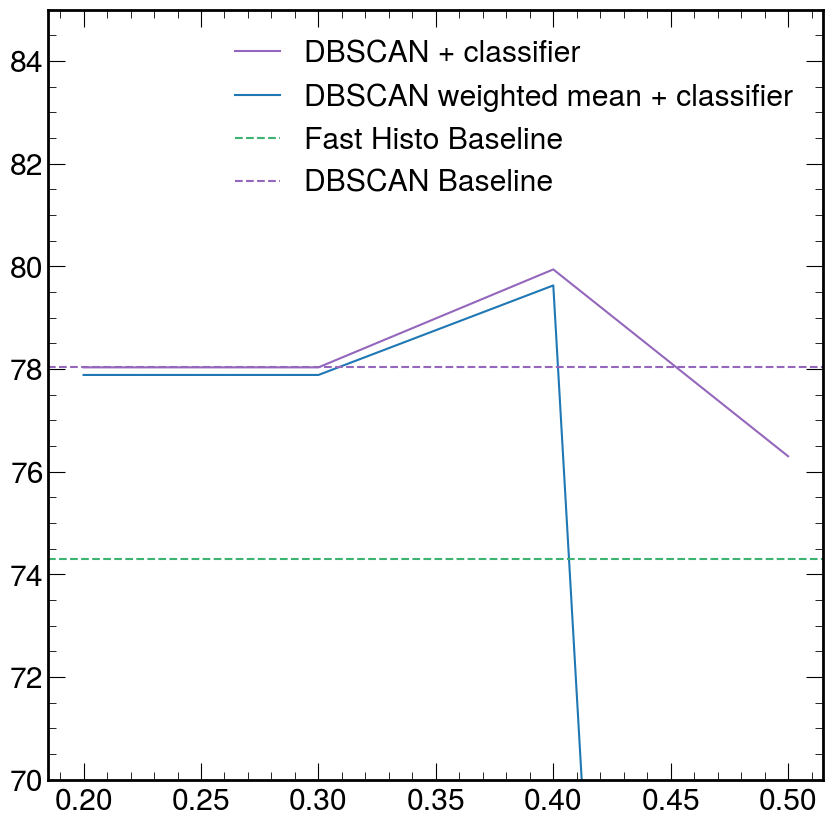

In [212]:
plt.plot(thresholds, db_eff_clf, label="DBSCAN + classifier", color="tab:purple")
plt.plot(
    thresholds,
    db_eff_wm_clf,
    label="DBSCAN weighted mean + classifier",
    color="tab:blue",
)
plt.axhline(fh_base_eff, label="Fast Histo Baseline", ls="--", color="mediumseagreen")
plt.axhline(db_base_eff, label="DBSCAN Baseline", ls="--", color="tab:purple")
plt.legend()
plt.ylim([70, 85])

In [213]:
print("hello")

hello
